# Statistical Analysis

[This notebook](https://github.com/dattalab/keypoint-moseq/blob/main/docs/source/analysis.ipynb) contains routines for analyzing the output of keypoint-MoSeq.

```{note}
The interactive widgets require jupyterlab launched from the `keypoint_moseq` environment. They will not work properly in jupyter notebook.
```


## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
<project_dir>/               ** current working directory
└── <model_name>/            ** model directory
    ├── results.h5           ** model results
    └── grid_movies/         ** [Optional] grid movies folder
```
Use the code below to enter in your project directory and model name.

In [1]:
import keypoint_moseq as kpms

#project_dir='LDOPA_DLC' # the full path to the project directory
#model_name='2024_04_30-16_52_29' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='6OHDA' # the full path to the project directory
#model_name='' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='MitoPark3age data' # the full path to the project directory
#model_name='' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='6OHDA_DLC' # the full path to the project directory
#model_name='2024_05_14-16_53_08' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

project_dir='MITOPARK_DLC' # the full path to the project directory
model_name='2024_05_23-17_43_55_e6-4e4'


In [2]:
import jax_moseq

kpms.__file__

'C:\\Programming\\keypoint-moseq\\keypoint_moseq\\__init__.py'

Text(0.5, 0, 'syllable duration (sec)')

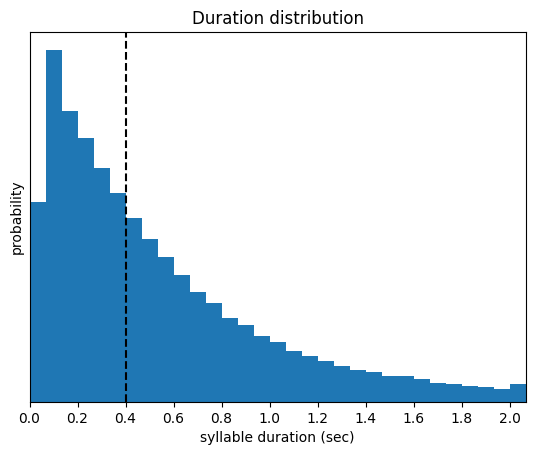

In [3]:
import matplotlib.pyplot as plt


kpms.plot_duration_distribution(project_dir, model_name)
plt.xticks(ticks=range(0,66,6), labels=[k/10 for k in range(0,22,2)])
plt.xlabel('syllable duration (sec)')

In [4]:
import matplotlib.pyplot as plt
import os

def save_analysis_figure(fig, plot_name, project_dir, model_name, save_dir):
    """Save an analysis figure.

    The figure is saved as both a .png and .pdf, either to `save_dir` if it is
    provided, or else to `project_dir/model_name/figures`.
    """
    if save_dir is None:
        save_dir = os.path.join(project_dir, model_name, "figures")
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, plot_name)
    fig.savefig(save_path + ".png", dpi=300)
    fig.savefig(save_path + ".svg", dpi=300)
    print(f"Saved figure to {save_path}.png")



## Assign Groups

The goal of this step is to assign group labels (such as "mutant" or "wildtype") to each recording. These labels are important later for performing group-wise comparisons.
- The code below creates a table called `{project_dir}/index.csv` and launches a widget for editing the table. To use the widget:
    - Click cells in the "group" column and enter new group labels.
    - Hit `Save group info` when you're done.
- **If the widget doesn't appear**, you also edit the table directly in Excel or LibreOffice Calc.

In [5]:
kpms.interactive_group_setting(project_dir, model_name)

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions. 

In [4]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 
moseq_df

name  centroid_x  \
0        2022-07-27_10-46-31_mitopark_exp_ncb838_result...  286.483219   
1        2022-07-27_10-46-31_mitopark_exp_ncb838_result...  287.260176   
2        2022-07-27_10-46-31_mitopark_exp_ncb838_result...  286.975137   
3        2022-07-27_10-46-31_mitopark_exp_ncb838_result...  287.669295   
4        2022-07-27_10-46-31_mitopark_exp_ncb838_result...  286.770229   
...                                                    ...         ...   
1918429  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...  316.012249   
1918430  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...  315.741564   
1918431  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...  316.021070   
1918432  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...  314.729600   
1918433  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...  315.448534   

         centroid_y   heading  angular_velocity  velocity_px_s  syllable  \
0         64.625449 -0.488781          0.000000       0.000000        11   
1         64.822575 -0.488781         -0.059995      24.047201        11   
2         64.626257 -0.494784         -0.112337      10.383114        11   
3         64.570366 -0.494784         -0.148968      20.892141        11   
4         63.561627 -0.516736         -0.161936      40.537490        11   
...             ...       ...               ...            ...       ...   
1918429  235.624411  0.064682          0.265154      19.233032         0   
1918430  235.483979  0.064682          0.203287       9.148365         0   
1918431  235.746299  0.064682          0.141812      11.499640         0   
1918432  234.909046  0.064682          0.086895      46.173556         0   
1918433  235.523599  0.064682          0.040548      28.374059         0   

         frame_index          group  onset  
0                  0  Control_22-24   True  
1                  1  Control_22-24  False  
2                  2  Control_22-24  False  
3                  3  Control_22-24  False  
4                  4  Control_22-24  False  
...              ...            ...    ...  
1918429        35949   MitoPark_6-8  False  
1918430        35950   MitoPark_6-8  False  
1918431        35951   MitoPark_6-8  False  
1918432        35952   MitoPark_6-8  False  
1918433        35953   MitoPark_6-8  False  

[1918434 rows x 10 columns]

Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [5]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df,
    min_frequency=0,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)                    # frame rate of the video from which keypoints were inferred

stats_df

save_dir = os.path.join(project_dir, model_name)
#stats_df.to_csv(os.path.join(save_dir, 'stats_df_all_syllables.csv'), index=False)
#print('Saved `stats_df` dataframe to', save_dir)

In [16]:
#calculate the absolute number of occurences for multiple syllables

from itertools import product

for k in product(stats_df.name.unique(),stats_df.syllable.unique()):
    value = moseq_df.loc[(moseq_df.name == k[0]) & (moseq_df.syllable == k[1])].onset.sum()
    stats_df.loc[(stats_df.name == k[0]) & (stats_df.syllable == k[1]),'abs_number'] = value
stats_df

group                                               name  \
0     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
1     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
2     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
3     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
4     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
...             ...                                                ...   
1169   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1170   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1171   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1172   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1173   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   

      syllable  heading_mean  heading_std  heading_min  heading_max  \
0            0      0.119949     1.621267    -3.140976     3.141193   
1            1      0.042341     1.642521    -3.140032     3.140984   
2            2      0.272477     1.796085    -3.137573     3.137856   
3            3      0.149351     1.849791    -3.140767     3.136964   
4            4      0.554472     1.716892    -2.879164     2.795456   
...        ...           ...          ...          ...          ...   
1169        17     -1.129006     0.423545    -2.344659    -0.331505   
1170        18     -0.679906     1.696244    -3.138781     3.137187   
1171        19      0.193295     2.317596    -3.134610     3.066705   
1172        20     -0.149817     0.788448    -2.194179     3.056960   
1173        21     -1.749034     1.864553    -3.136578     3.139444   

      angular_velocity_mean  angular_velocity_std  angular_velocity_min  \
0                 -0.025735              9.742934           -188.419347   
1                  0.140866             10.444220           -187.678380   
2                 -0.427913             20.018144           -187.666606   
3                  0.132102             11.316842           -187.553295   
4                  0.435054             13.680526           -172.989726   
...                     ...                   ...                   ...   
1169               0.199550              1.457507             -3.957044   
1170              -1.156861             24.339012           -188.321539   
1171              -0.375106             20.239973           -144.476186   
1172              -0.460568              1.259577             -4.022800   
1173              -1.338604             25.406236           -188.176408   

      angular_velocity_max  velocity_px_s_mean  velocity_px_s_std  \
0               188.337259           45.828081          43.149594   
1               187.735936           61.946437          44.022201   
2               187.282689           62.418966          44.157195   
3               188.173275           45.407926          37.393780   
4               175.029086           27.699498          20.564007   
...                    ...                 ...                ...   
1169              3.550134           35.892231          22.445329   
1170            188.318619           21.005121          14.068586   
1171             76.113529           37.103099          29.159501   
1172              1.584583          139.684934          57.610865   
1173            188.090467           96.645790          70.273456   

      velocity_px_s_min  velocity_px_s_max  frequency  duration  abs_number  
0              0.382817         249.499154   0.233645  0.702196       425.0  
1              0.926117         237.278300   0.156679  0.440234       285.0  
2              0.644359         250.587884   0.122595  0.452317       223.0  
3              0.381476         226.632492   0.130291  0.620534       237.0  
4              1.062891         119.442392   0.034085  0.241398        62.0  
...                 ...                ...        ...       ...         ..

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\Abs_num_spread.png


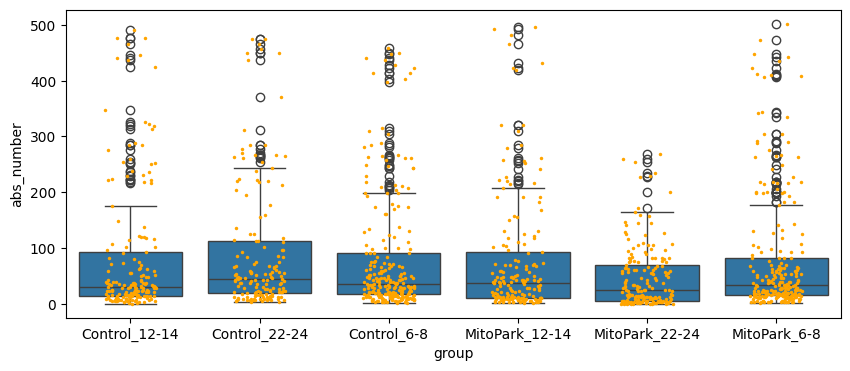

In [17]:
import seaborn as sns
figsize = (10,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.boxplot(data=stats_df, x='group', y='abs_number', ax=ax)
sns.stripplot(data=stats_df, x='group', y='abs_number', color="orange", jitter=0.2, size=2.5, ax=ax)

save_analysis_figure(fig, 'Abs_num_spread', project_dir, model_name, save_dir=None)
#ax.set_ylim([0, 4])

### **Optional:** Save dataframes to csv
Uncomment the code below to save the dataframes as .csv files

In [15]:
import os

# # save moseq_df
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

# # save stats_df
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4
Saved `stats_df` dataframe to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4


##  Label syllables

The goal of this step is name each syllable (e.g., "rear up" or "walk slowly").
- The code below creates an empty table at `{project_dir}/{model_name}/syll_info.csv` and launches an interactive widget for editing the table. To use the widget:
    - Select a syllable from the dropdown to display its grid movie.
    - Enter a name into the `label` column of the table (and optionally a short description too).
    - When you are done, hit `Save syllable info` at the bottom of the table.
- **If the widget doesn't appear**, you can also edit the file directly in Excel or LibreOffice Calc.

In [6]:
kpms.label_syllables(project_dir, model_name, moseq_df)

Row
    [0] Column
        [0] Select(options=[0, 1, 2, 3, 4, ...], value=0)
        [1] ParamFunction(function, _pane=Video, defer_load=False)
    [1] Column
        [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'syllable': 'syllable', ...}, value=    syllable  ..., widths={'syllable': 100})
        [1] Column
            [0] Button(button_type='primary', name='Save syllable info')

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

In [21]:
syllables_to_plot = [2,6,7]
stats_df1 = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
stats_df1.columns

Index(['group', 'name', 'syllable', 'heading_mean', 'heading_std',
       'heading_min', 'heading_max', 'angular_velocity_mean',
       'angular_velocity_std', 'angular_velocity_min', 'angular_velocity_max',
       'velocity_px_s_mean', 'velocity_px_s_std', 'velocity_px_s_min',
       'velocity_px_s_max', 'frequency', 'duration', 'abs_number'],
      dtype='object')

In [7]:
import pandas as pd

file = 'C:/Programming/keypoint-moseq/MITOPARK_DLC/2024_05_23-17_43_55_e6-4e4/stats_df.csv'
stats_df = pd.read_csv(file)
syllables_to_plot = list(range(21))
groups_to_plot = ['Control_6-8' ,'Control_12-14', 'Control_22-24']
#syllables_to_plot = [23,28,37,43,44,49,51]
stats_df1 = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
stats_df1 = stats_df1.loc[stats_df.group.isin(groups_to_plot)]
stats_df1

group                                               name  \
0    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
1    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
2    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
3    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
4    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
..             ...                                                ...   
565    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
566    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
567    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
568    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
569    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   

     syllable  heading_mean  heading_std  heading_min  heading_max  \
0           0      0.119949     1.621267    -3.140976     3.141193   
1           1      0.042341     1.642521    -3.140032     3.140984   
2           2      0.272477     1.796085    -3.137573     3.137856   
3           3      0.149351     1.849791    -3.140767     3.136964   
4           4      0.554472     1.716892    -2.879164     2.795456   
..        ...           ...          ...          ...          ...   
565        16     -1.291181     1.240827    -2.999010     2.988720   
566        17     -1.527505     0.939970    -3.106973     3.033457   
567        18     -0.135137     1.678225    -2.265482     2.201863   
568        19      0.119998     1.951031    -2.716083     2.996567   
569        20     -0.193469     0.453301    -1.405902     0.420773   

     angular_velocity_mean  angular_velocity_std  angular_velocity_min  \
0                -0.025735              9.742934           -188.419347   
1                 0.140866             10.444220           -187.678380   
2                -0.427913             20.018144           -187.666606   
3                 0.132102             11.316842           -187.553295   
4                 0.435054             13.680526           -172.989726   
..                     ...                   ...                   ...   
565              -0.210873              0.883010             -2.755904   
566              -1.460925             20.587203           -186.371413   
567              -0.036800              2.248441            -14.651268   
568               1.970042             43.223404           -183.163126   
569              -0.737852              1.055139             -3.521408   

     angular_velocity_max  velocity_px_s_mean  velocity_px_s_std  \
0              188.337259           45.828081          43.149594   
1              187.735936           61.946437          44.022201   
2              187.282689           62.418966          44.157195   
3              188.173275           45.407926          37.393780   
4              175.029086           27.699498          20.564007   
..                    ...                 ...                ...   
565              3.694048           79.548387          60.828780   
566              3.021862           34.304817          20.705183   
567             14.230836           16.766354           8.994283   
568            174.596634           67.893953          50.312653   
569              1.360849          111.041412          44.649717   

     velocity_px_s_min  velocity_px_s_max  frequency  duration  abs_number  
0             0.382817         249.499154   0.233645  0.702196         425  
1             0.926117         237.278300   0.156679  0.440234         285  
2             0.644359         250.587884   0.122595  0.452317         223  
3             0.381476         226.632492   0.130291  0.620534         237  
4             1.062891         119.442392   0.034085  0.241398          62  
..                 ...                ...        ...       ...         ...  
565           1.903727         265.944541   0.0070

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\frequency_stat_stats.png


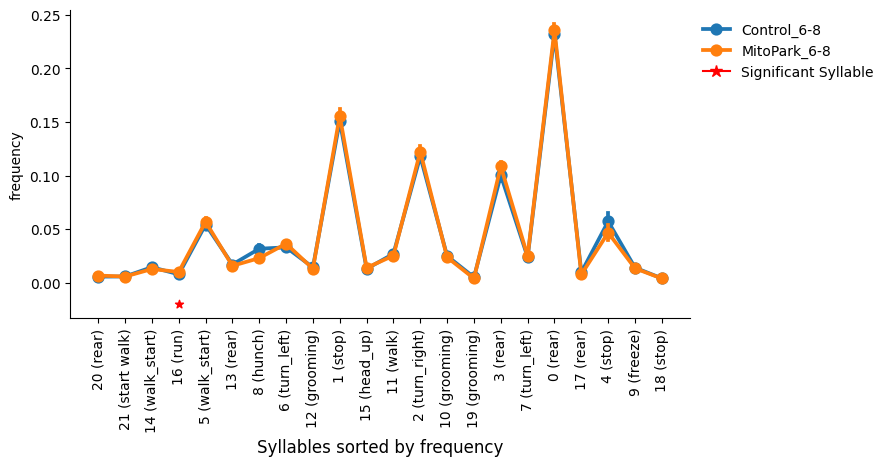

In [21]:
fig1, leg1 =kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_name,
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='frequency', # statistic to be plotted (e.g. 'frequency', 'duration' or 'velocity_px_s_mean')
    stat_order='velocity_px_s_mean',
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='Control_6-8',   # name of the control group for statistical testing
    exp_group='MitoPark_6-8',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size
    groups=['Control_6-8','MitoPark_6-8'], # groups to be plotted,
    in_y = 0.02
);

#ax1 = plt.gca()
#ax1.set_ylim([0,3])

PearsonRResult(statistic=0.902769381579966, pvalue=2.1626507256193947e-08)

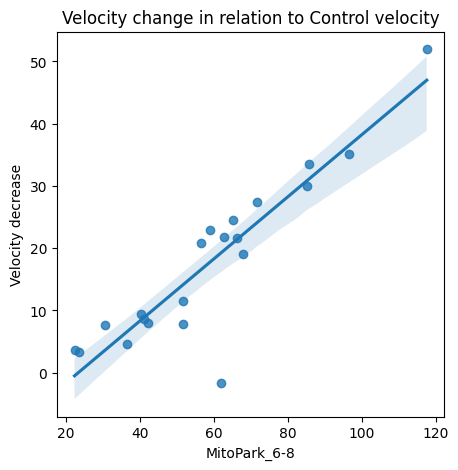

In [185]:
import seaborn as sns
import pandas as pd
import scipy.stats

#file = 'C:/Programming/keypoint-moseq/6OHDA_DLC/6ohda/stats_df.csv'
#stats_df = pd.read_csv(file)
stats_df = stats_df1.copy()
#syllables_to_plot = list(range(30))
groups_to_plot = ['MitoPark_6-8','MitoPark_12-14', 'MitoPark_22-24']
#stats_df = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
#velocity = table['group','syllable','velocity_3d_mm_mean']
#frequency = table['frequency']

velocity1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','velocity_px_s_mean']].rename(columns={'velocity_px_s_mean':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
velocity2 = stats_df.loc[stats_df.group.isin([groups_to_plot[2]]),['syllable','velocity_px_s_mean']].rename(columns={'velocity_px_s_mean':groups_to_plot[2]}).pivot_table(index='syllable', dropna=True)
velocity = pd.concat([velocity1.reset_index(), velocity2.reset_index()], axis=1)
velocity['Velocity decrease'] = velocity[groups_to_plot[0]] - velocity[groups_to_plot[2]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Velocity change in relation to Control velocity')
sns.regplot(data=velocity, x=groups_to_plot[0], y='Velocity decrease', ax=ax)
scipy.stats.pearsonr(x=velocity[groups_to_plot[0]], y=velocity['Velocity decrease'])
#save_analysis_figure(fig, 'Velocity_correlation-22-24', project_dir, model_name, save_dir=None)

<Axes: title={'center': 'Frequency change in relation to Control frequency'}, xlabel='MitoPark_6-8', ylabel='Frequency decrease'>

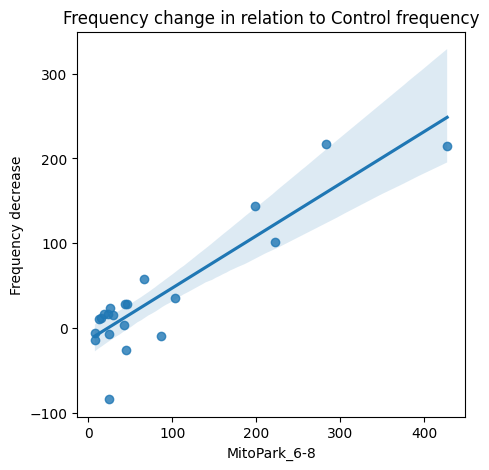

In [182]:
frequency1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','abs_number']].rename(columns={'abs_number':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
frequency2 = stats_df.loc[stats_df.group.isin([groups_to_plot[2]]),['syllable','abs_number']].rename(columns={'abs_number':groups_to_plot[2]}).pivot_table(index='syllable', dropna=True)
frequency = pd.concat([frequency1.reset_index(), frequency2.reset_index()], axis=1)
frequency['Frequency decrease'] = frequency[groups_to_plot[0]] - frequency[groups_to_plot[2]]
#frequency[groups_to_plot[0]] = velocity[groups_to_plot[0]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Frequency change in relation to Control frequency')
sns.regplot(data=frequency, x=groups_to_plot[0], y='Frequency decrease', ax=ax)
#save_analysis_figure(fig, 'Frequency_correlation-22-24', project_dir, model_name, save_dir=None)

PearsonRResult(statistic=0.5036144569402256, pvalue=0.019937679432706277)

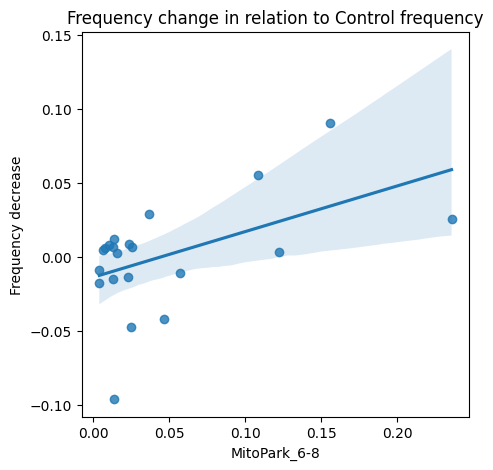

In [189]:
frequency1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','frequency']].rename(columns={'frequency':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
frequency2 = stats_df.loc[stats_df.group.isin([groups_to_plot[2]]),['syllable','frequency']].rename(columns={'frequency':groups_to_plot[2]}).pivot_table(index='syllable', dropna=True)
frequency = pd.concat([frequency1.reset_index(), frequency2.reset_index()], axis=1)
frequency['Frequency decrease'] = frequency[groups_to_plot[0]] - frequency[groups_to_plot[2]]
#frequency[groups_to_plot[0]] = velocity[groups_to_plot[0]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Frequency change in relation to Control frequency')
sns.regplot(data=frequency, x=groups_to_plot[0], y='Frequency decrease', ax=ax)
scipy.stats.pearsonr(x=frequency[groups_to_plot[0]], y=frequency['Frequency decrease'])
#save_analysis_figure(fig, 'Frequency_correlation', project_dir, model_name, save_dir=None)

In [170]:
frequency

syllable  MitoPark_6-8  syllable  MitoPark_22-24  Frequency decrease
0          0    427.545455         0      212.444444          215.101010
1          1    283.090909         1       65.888889          217.202020
2          2    222.090909         2      121.222222          100.868687
3          3    198.000000         3       54.666667          143.333333
4          4     86.545455         4       96.222222           -9.676768
5          5    102.818182         5       67.333333           35.484848
6          6     66.000000         6        8.000000           58.000000
7          7     45.272727         7       71.333333          -26.060606
8          8     42.818182         8       39.111111            3.707071
9          9     24.636364         9      108.555556          -83.919192
10        10     43.818182        10       15.444444           28.373737
11        11     46.181818        11       17.777778           28.404040
12        12     24.454545        12       31.666667           -7.212121
13        13     29.272727        13       14.000000           15.272727
14        14     23.363636        14        6.555556           16.808081
15        15     25.818182        15        2.166667           23.651515
16        16     18.545455        16        2.500000           16.045455
17        17     14.363636        17        2.111111           12.252525
18        18      7.636364        18       22.444444          -14.808081
19        19      7.909091        19       14.125000           -6.215909
20        20     12.454545        20        2.285714           10.168831

### Transition matrices
Generate heatmaps showing the transition frequencies between syllables.

Group(s): Control_12-14, Control_22-24, Control_6-8, MitoPark_12-14, MitoPark_22-24, MitoPark_6-8
Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\transition_matrices.png


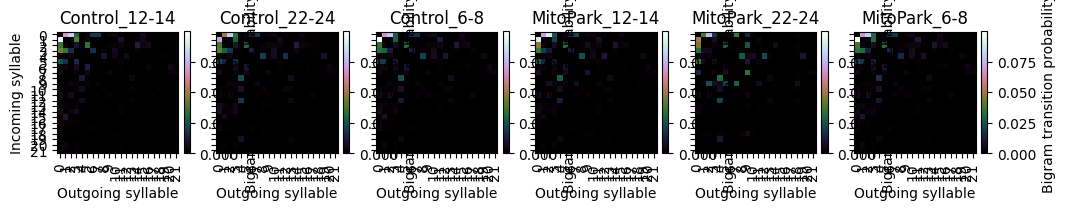

In [2]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

In [ ]:
#Reorder the transition matrices

new_order = [0,1,5,3,10,6,2,8,9,4,11,7,12,13,14]

def rearrange_matrix(mats_list, new_order):
    new_mats_list = []
    for k in mats_list:
        k = k[:, new_order][new_order]
        new_mats_list.append(k)
    return new_mats_list

trans_mats_speed = rearrange_matrix(trans_mats, new_order)

kpms.visualize_transition_bigram(
    project_dir, model_name, [groups[0]], [trans_mats_speed[0]], syll_include, normalize=normalize, 
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)



In [41]:
#groups = ['MitoPark_6-8', 'MitoPark_12-14',  
# 'MitoPark_22-24', 'Control_6-8', 'Control_12-14',
# 'Control_22-24']

group_idx_dict = {group: idx for idx, group in enumerate(groups)}
group_idx_dict

{'Control_12-14': 0,
 'Control_22-24': 1,
 'Control_6-8': 2,
 'MitoPark_12-14': 3,
 'MitoPark_22-24': 4,
 'MitoPark_6-8': 5}

<Axes: >

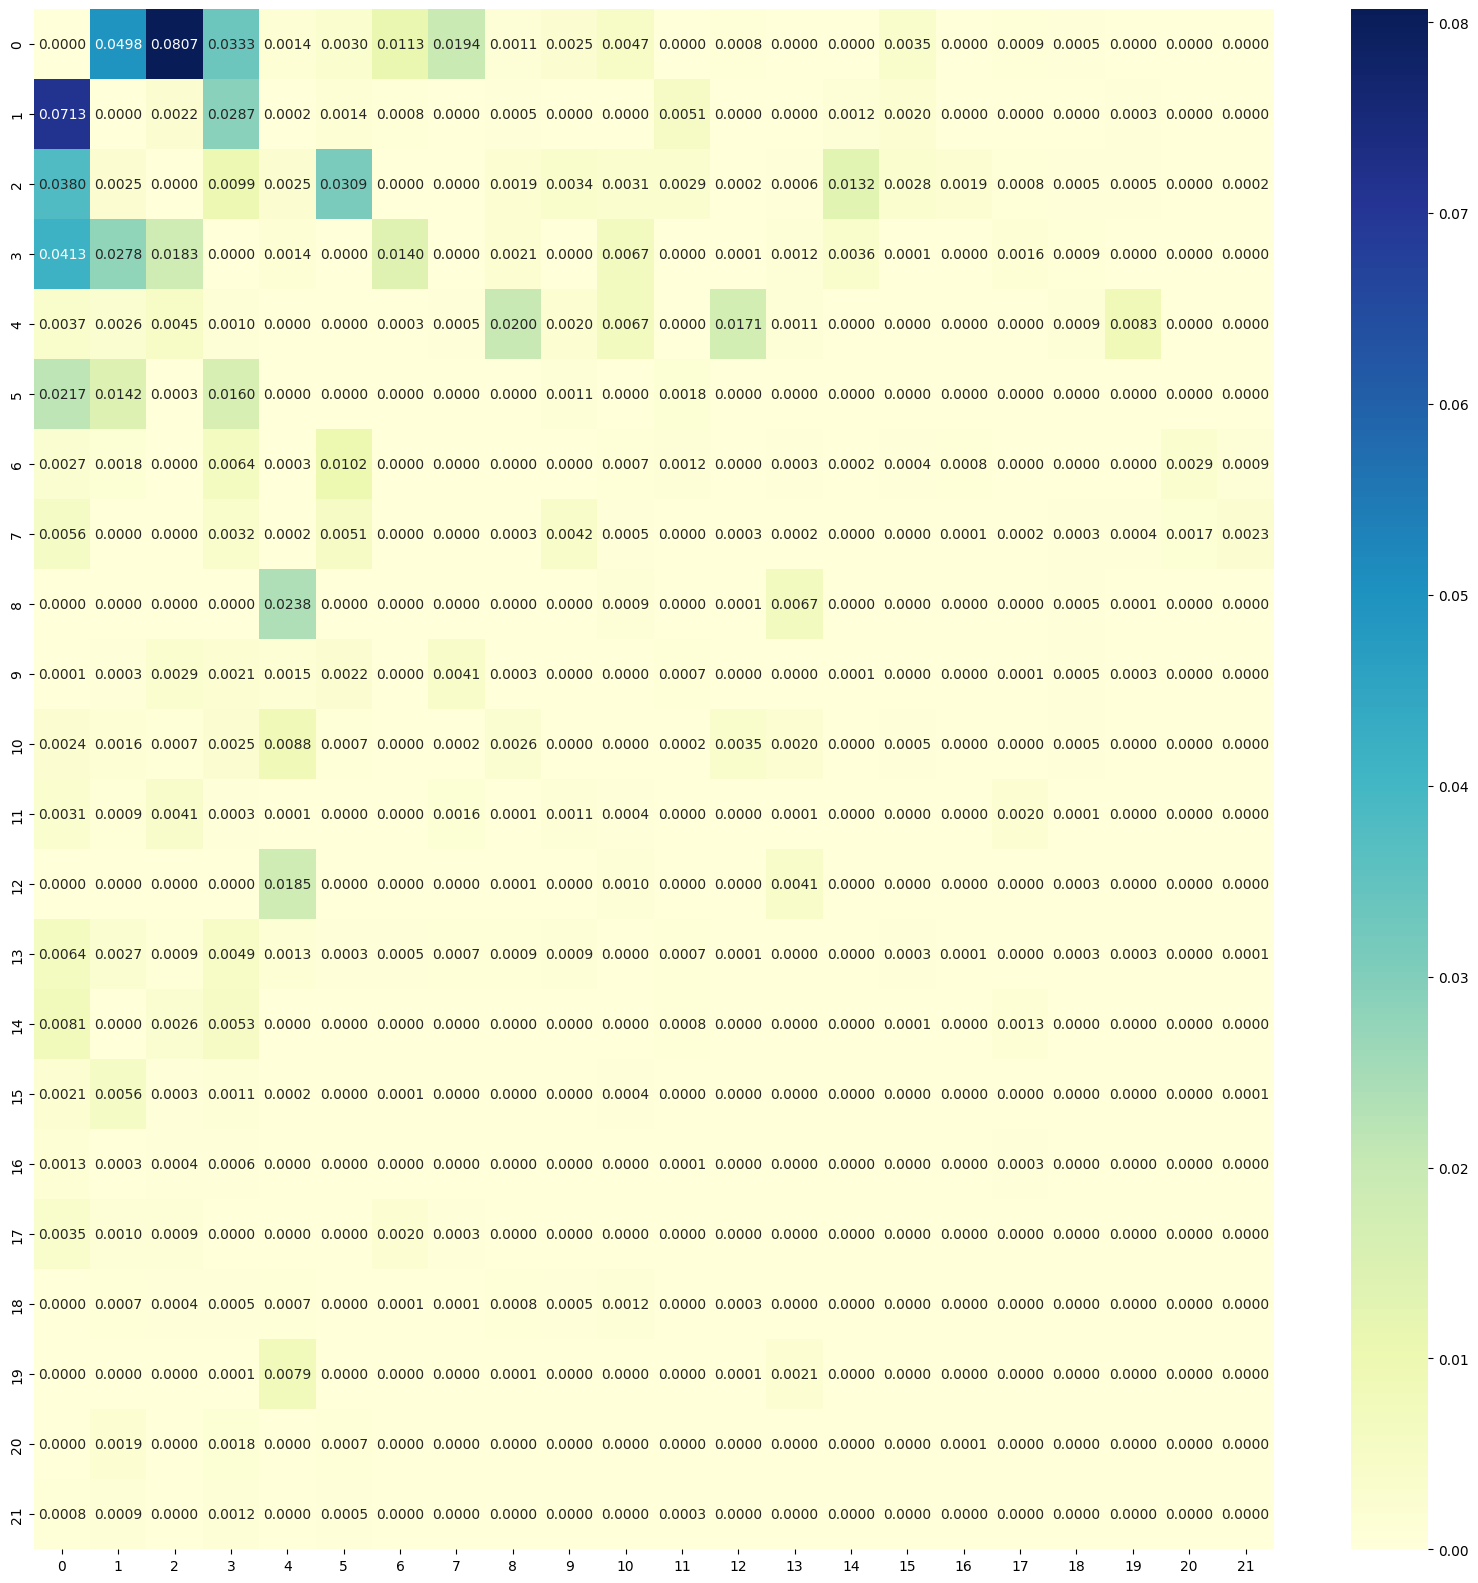

In [9]:
#Make a heatmap representing transition probabilities for one animal

import pandas as pd
import seaborn as sns

figsize = (20,20)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.heatmap(pd.DataFrame(trans_mats[1]), cmap='YlGnBu', annot=True, fmt='.4f', ax=ax)
#save_analysis_figure(fig, 'Transitions_Mitopark-22-24', project_dir, model_name, save_dir=None)

Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\Transition_Difference-12-14.png


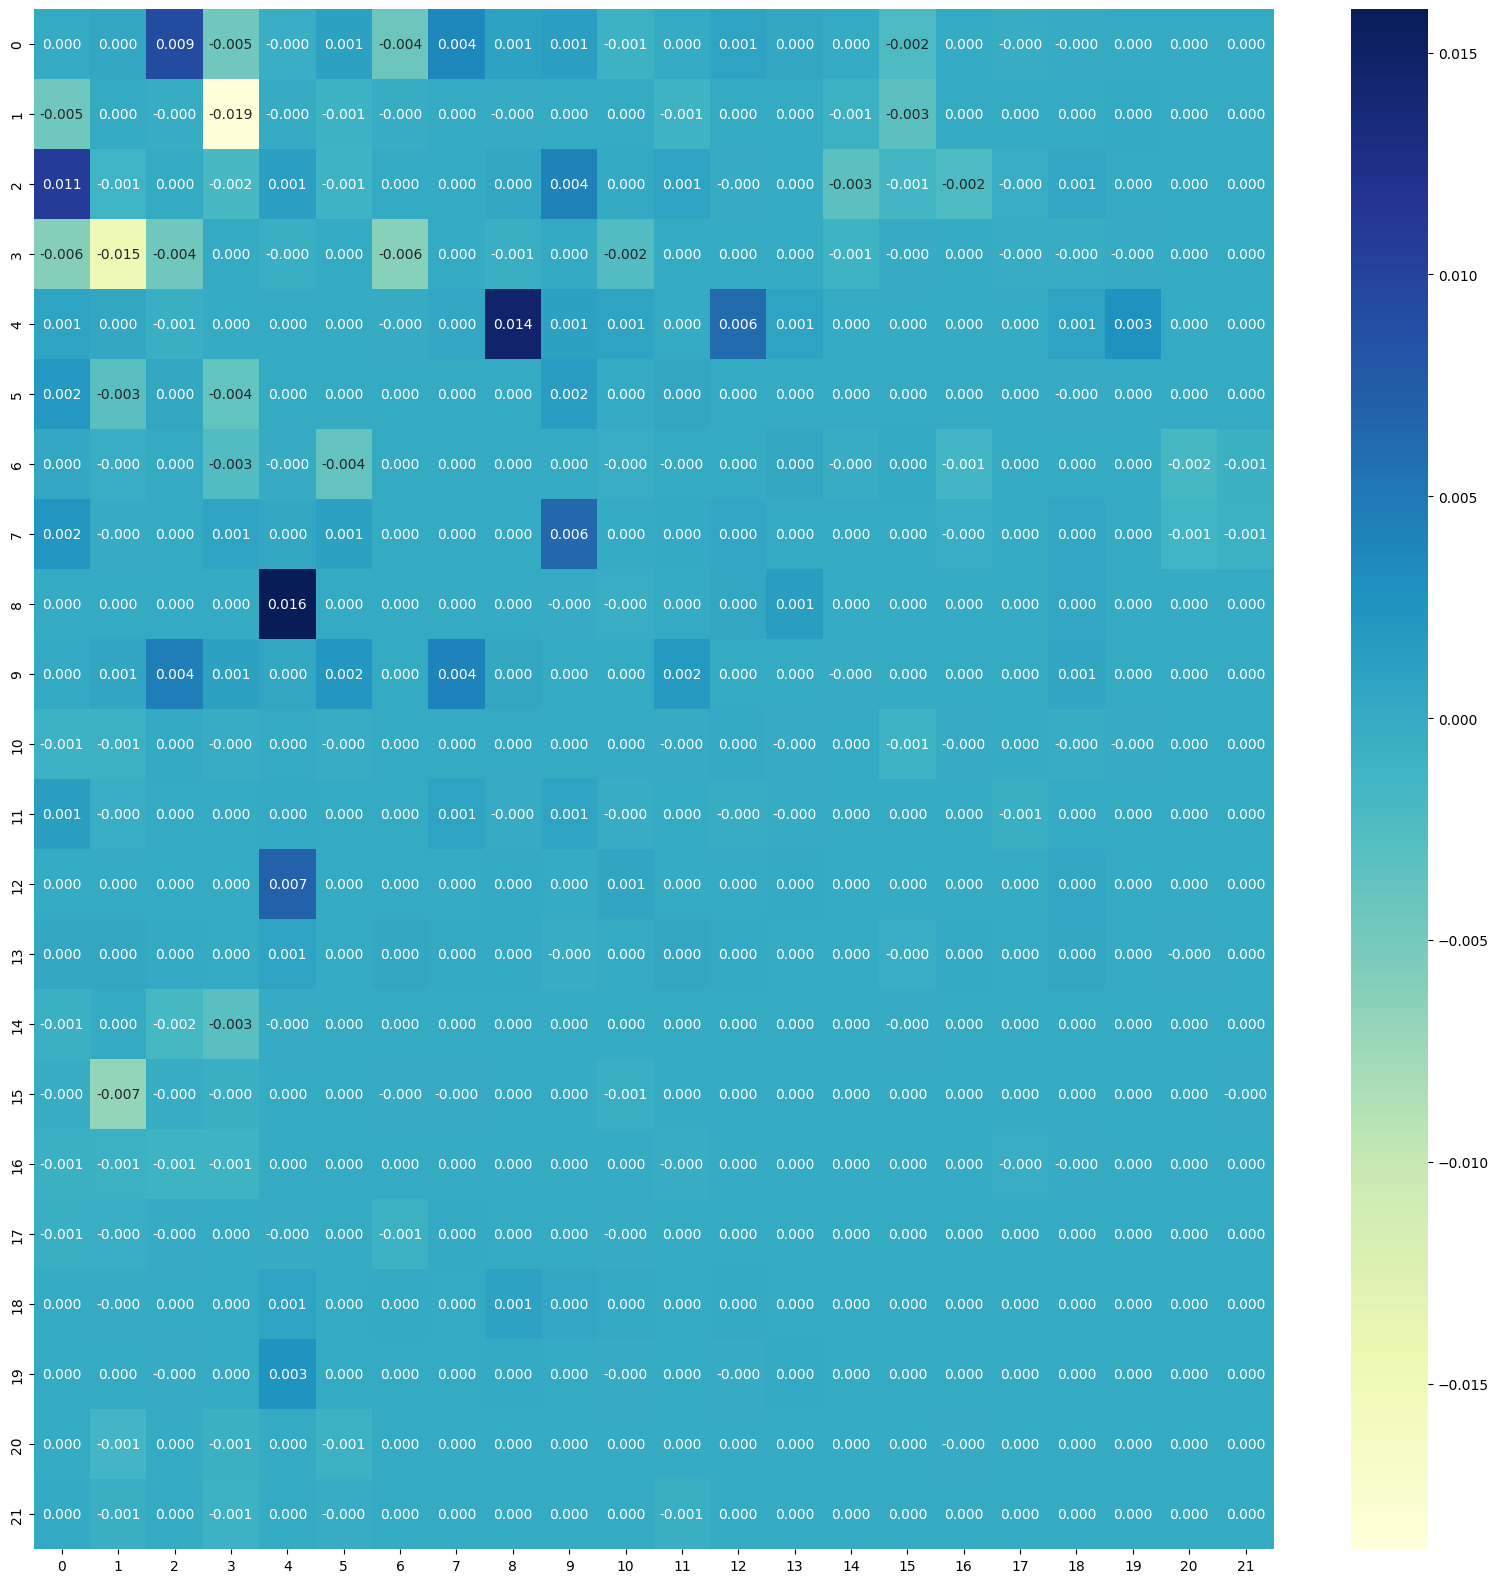

In [46]:
#Make a heatmap representing transition probability difference for one timepoint

import seaborn as sns
import pandas as pd

figsize = (20,20)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.heatmap(pd.DataFrame(trans_mats[3]-trans_mats[0]), cmap='YlGnBu', annot=True, fmt='.3f', ax=ax)
save_analysis_figure(fig, 'Transition_Difference-12-14', project_dir, model_name, save_dir=None)

In [60]:
#save transition matrices for entropy analyses
# save the resulting transition matrix from each group as an h5

import h5py
import numpy as np

with h5py.File('transition_matrices.h5','w') as h5f:
    h5f.create_dataset("transitions", data=np.asarray(trans_mats) )
    h5f.create_dataset("usages", data=np.asarray(usages) )
    h5f.create_dataset("included", data=np.asarray(syll_include) )

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge width showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction).

Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\transition_graphs.png


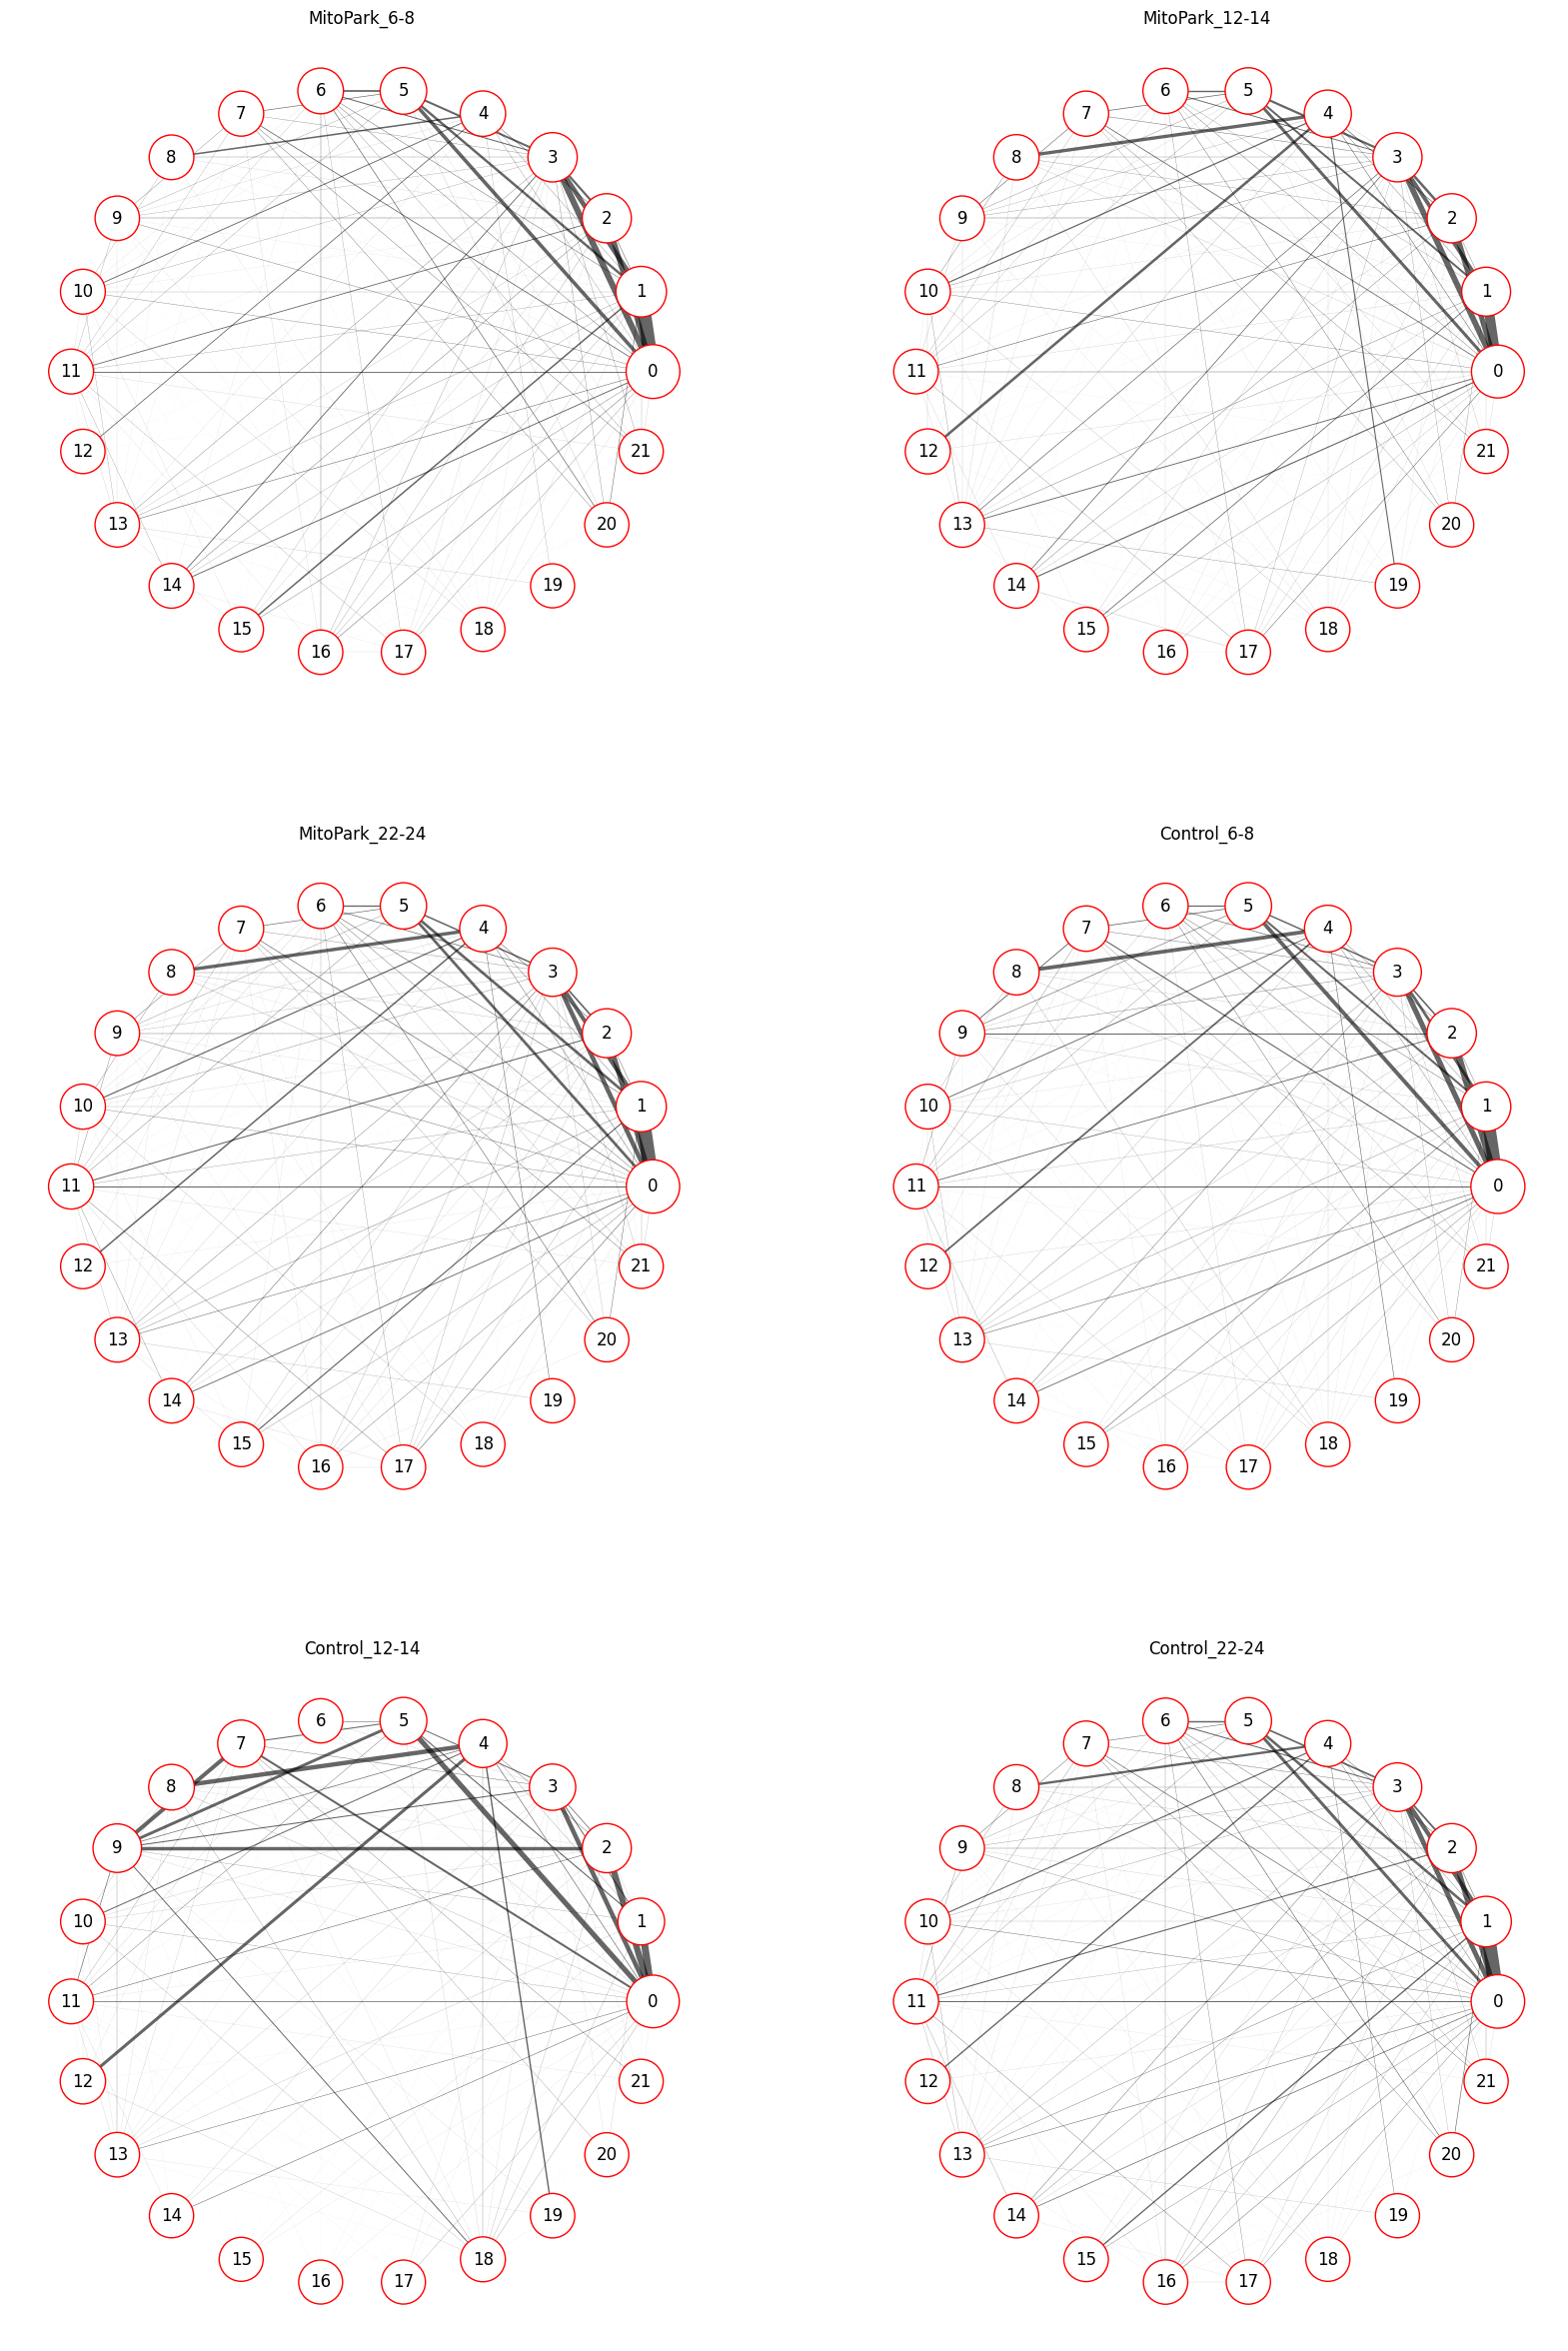

In [10]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\transition_graphs_diff.png


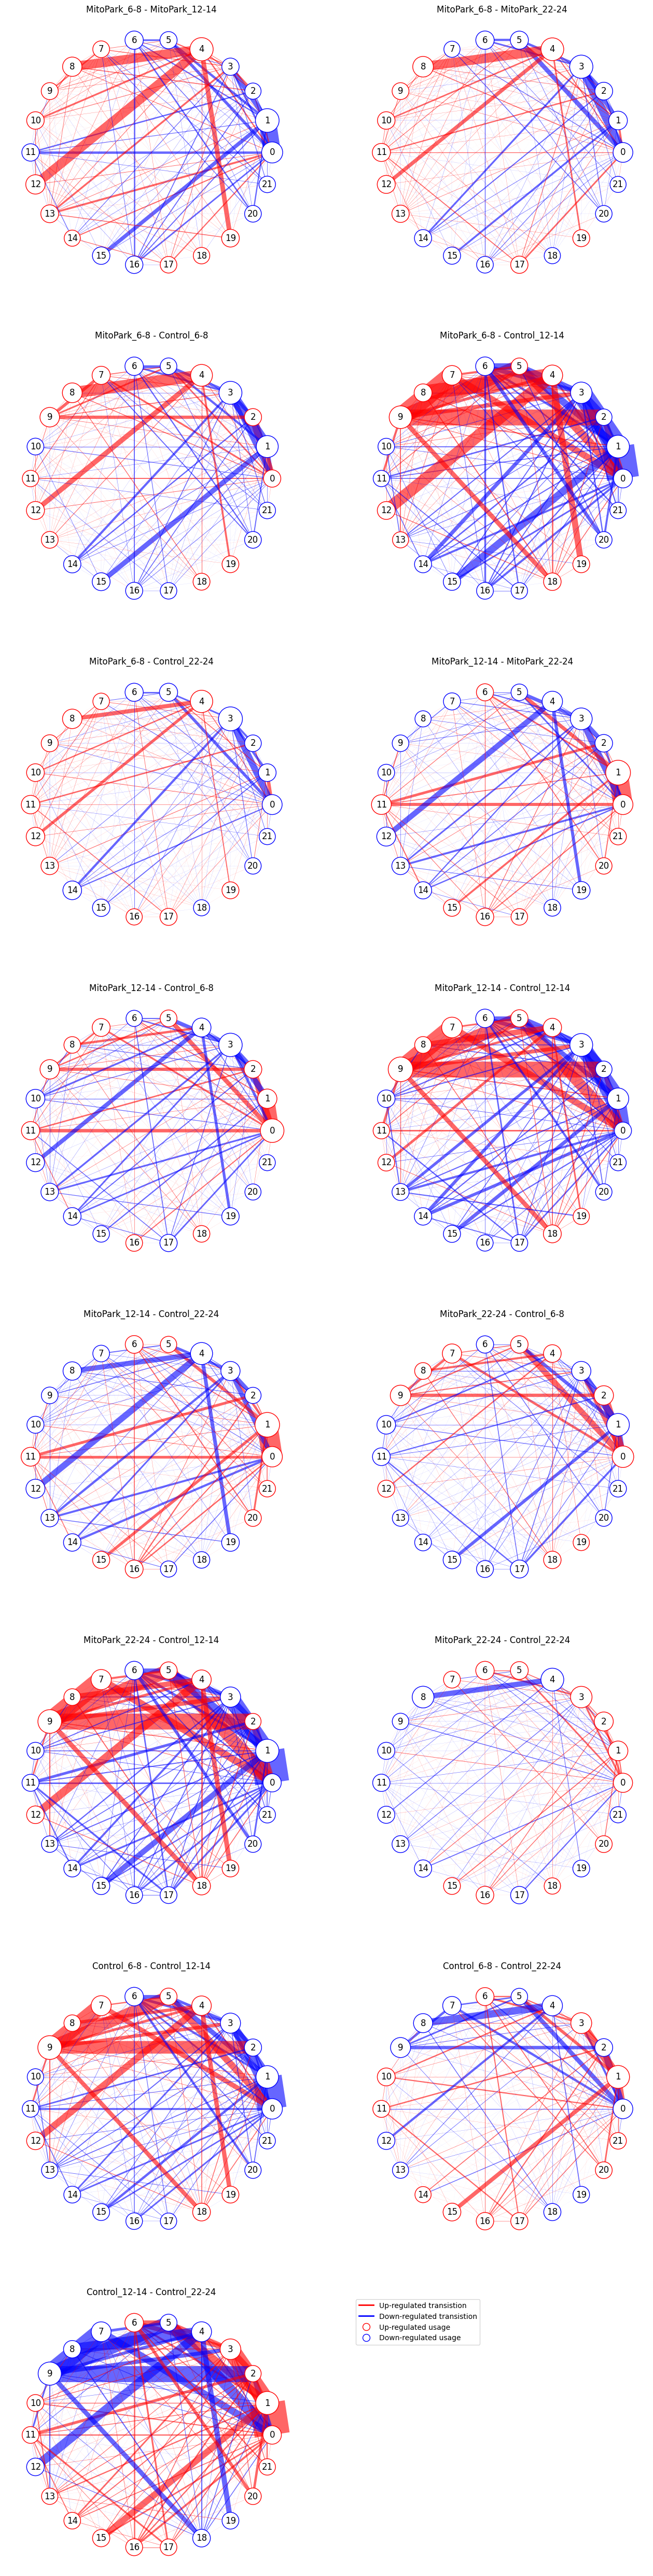

In [11]:
# Generate a difference-graph for each pair of groups.


kpms.plot_transition_graph_difference(project_dir, model_name, 
                                       groups, trans_mats,
                                      usages, syll_include, layout='circular') # transition graph layout ("circular" or "spring")

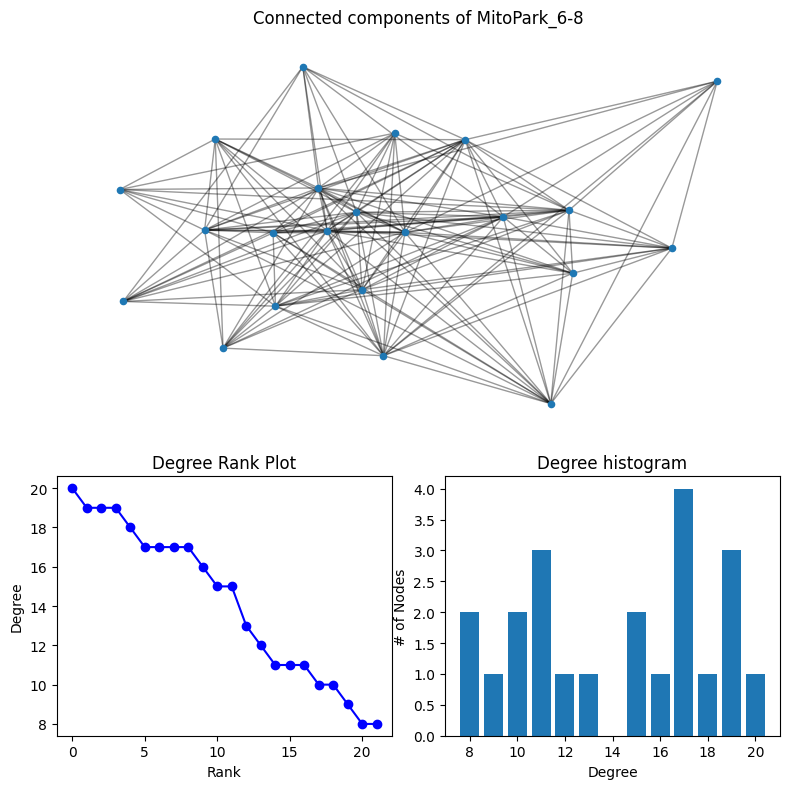

Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\Degree_analysis_MitoPark_6-8.png


In [64]:
# Degree analysis for different groups (to determine clusters of syllables expressed together)

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

l=5
G = nx.from_numpy_array(trans_mats[l] * 100)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of " + groups[l])
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()
save_analysis_figure(fig, 'Degree_analysis_' + groups[l], project_dir, model_name, save_dir=None)

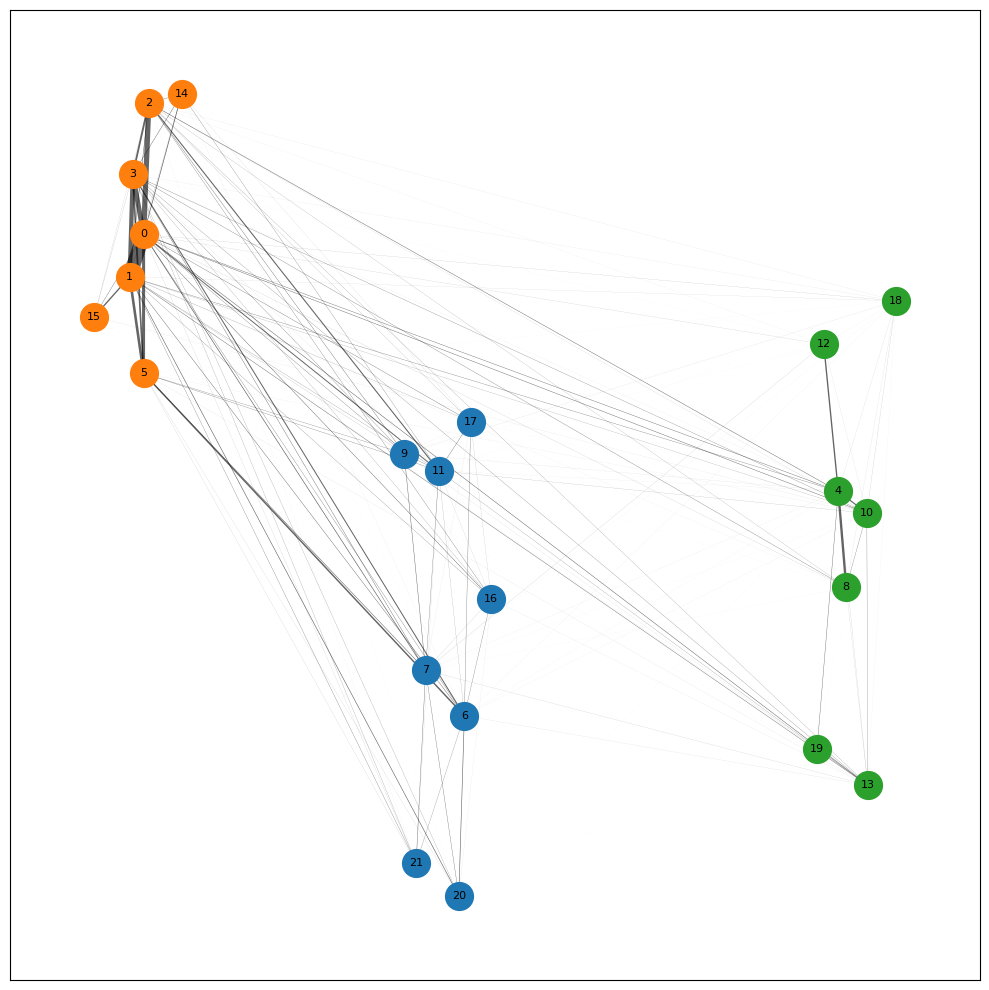

Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\Node_clustering_MitoPark_6-8.png


In [126]:
#Find clusters

import networkx as nx
import matplotlib.pyplot as plt


def get_syllable_names(project_dir, model_name, syllable_ixs):
    """Get syllable names from syll_info.csv file. Labels consist of the
    syllable index, followed by the syllable label, if it exists.

    Parameters
    ----------
    project_dir : str
        the path to the project directory
    model_name : str
        the name of the model directory
    syllable_ixs : list
        list of syllable indices to get names for

    Returns
    -------
    names: list of str
        list of syllable names
    """
    labels = {ix: f"{ix}" for ix in syllable_ixs}
    syll_info_path = os.path.join(project_dir, model_name, "syll_info.csv")
    if os.path.exists(syll_info_path):
        syll_info_df = pd.read_csv(syll_info_path, index_col=False).fillna("")

        for ix in syllable_ixs:
            if len(syll_info_df[syll_info_df.syllable == ix].label.values[0]) > 0:
                labels[ix] = (
                    f"{ix} ({syll_info_df[syll_info_df.syllable == ix].label.values[0]})"
                )
    names = [labels[ix] for ix in syllable_ixs]
    return names


l=5
G = nx.from_numpy_array(trans_mats[l] * 100)
communities = nx.community.greedy_modularity_communities(G, weight='weight', cutoff=2)
widths = nx.get_edge_attributes(G, "weight")
#syll_names = get_syllable_names(project_dir, model_name, syll_include)
syll_names = [f"{ix}" for ix in syll_include]

# Compute positions for the node clusters as if they were themselves nodes in a
# supergraph using a larger scale factor
supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(G, scale=50, seed=429)

# Use the "supernode" positions as the center of each node cluster
centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, seed=1430))

fig = plt.figure("Clustering a graph", figsize=(10, 10))
# Nodes colored by cluster
for nodes, clr in zip(communities, ("tab:blue", "tab:orange", "tab:green")):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=clr, node_size=400)
nx.draw_networkx_edges(G, pos=pos, width=list(widths.values()), alpha=0.6)
nx.draw_networkx_labels(
            G,
            pos=pos,
            labels=dict(zip(G.nodes(), syll_names)),
            font_color="black",
            font_size=8)

plt.tight_layout()
plt.show()
save_analysis_figure(fig, 'Node_clustering_' + groups[l], project_dir, model_name, save_dir=None)

In [134]:
#Takes on finding recursive  of syllables

l=5
G = nx.from_numpy_array(trans_mats[l] * 100)

### Based ON CLIQUES ###
#list(nx.enumerate_all_cliques(G))
#list(nx.find_cliques(G))
#nx.make_max_clique_graph(G)

### BASED ON CHAINS ###
list(nx.chain_decomposition(G))

[[(0, 2), (2, 1), (1, 0)],
 [(0, 3), (3, 2)],
 [(0, 4), (4, 3)],
 [(0, 6), (6, 4)],
 [(0, 5), (5, 6)],
 [(0, 9), (9, 5)],
 [(0, 7), (7, 9)],
 [(0, 8), (8, 7)],
 [(0, 10), (10, 8)],
 [(0, 11), (11, 10)],
 [(0, 12), (12, 11)],
 [(0, 13), (13, 12)],
 [(0, 15), (15, 13)],
 [(0, 21), (21, 15)],
 [(0, 16), (16, 13)],
 [(0, 17), (17, 16)],
 [(0, 14), (14, 17)],
 [(0, 18), (18, 13)],
 [(1, 3)],
 [(1, 4)],
 [(1, 6)],
 [(1, 5)],
 [(1, 8)],
 [(1, 10)],
 [(1, 11)],
 [(1, 13)],
 [(1, 15)],
 [(1, 21)],
 [(1, 16)],
 [(1, 17)],
 [(1, 14)],
 [(1, 20), (20, 14)],
 [(1, 18)],
 [(1, 19), (19, 18)],
 [(1, 9)],
 [(2, 4)],
 [(2, 6)],
 [(2, 5)],
 [(2, 9)],
 [(2, 8)],
 [(2, 10)],
 [(2, 11)],
 [(2, 12)],
 [(2, 13)],
 [(2, 15)],
 [(2, 21)],
 [(2, 16)],
 [(2, 17)],
 [(2, 14)],
 [(2, 18)],
 [(2, 19)],
 [(3, 6)],
 [(3, 5)],
 [(3, 7)],
 [(3, 8)],
 [(3, 10)],
 [(3, 11)],
 [(3, 12)],
 [(3, 13)],
 [(3, 15)],
 [(3, 21)],
 [(3, 16)],
 [(3, 17)],
 [(3, 14)],
 [(3, 20)],
 [(3, 18)],
 [(3, 9)],
 [(4, 9)],
 [(4, 7)],
 [(4, 8

In [12]:
# Defining the functions to work with entropy matrices

import numpy as np
import scipy.linalg
import numpy as np
import pandas as pd
from os.path import join
from numpy import linalg as LA
from jax_moseq.utils import get_durations, get_frequencies



def local_entropy(tr_mat, truncate_syllable=40):
    """Computes the local entropy at each state of the MC defined by the transition
    probabilities P"""
    # TODO: Not optimal memory wise !!
    P = tr_mat[:truncate_syllable, :truncate_syllable]
    L = np.copy(P)
    L[P > 0] = np.log2(P[P > 0])
    K = np.dot(P, np.transpose(L))
    entropy_out = -1*np.diagonal(K)
    return entropy_out.reshape((P.shape[0], 1))


def entropy_rate(use_labels, use_tmxs, truncate_syllable=40, normalize='bigram',
                 smoothing=1.0, tm_smoothing=1.0):
    '''
    Computes entropy rate, base 2 using provided syllable labels. If
    syllable labels have not been re-labeled by usage, this function will do so.
    Parameters
    ----------
    use_labels (list or np.ndarray): a list of label arrays, where each entry in the list
            is an array of labels for one subject.
    use_tmxs (list or np.ndarray): a list of transition matrixes precalculated.
    truncate_syllable (int): maximum number of labels to keep for this calculation.
    normalize (str): the type of transition matrix normalization to perform. Options
            are: 'bigram', 'rows', or 'columns'.
    smoothing (float): a constant added to label usages before normalization
    tm_smoothing (float): a constant added to label transtition counts before normalization.
   
    Returns
    -------
    ent (list): list of entropy rates per syllable label
    '''
    labels = use_labels.copy()
    tmxs = use_tmxs.copy()
    ent = []
    for v in zip(labels, tmxs):
        usages = get_frequencies(v[0])
        usages = usages[:truncate_syllable] + smoothing
        usages /= usages.sum()

        tm = v[1] + tm_smoothing

        tm = tm[:truncate_syllable, :truncate_syllable]

        if normalize == 'bigram':
            tm /= tm.sum()
        elif normalize == 'rows':
            tm /= tm.sum(axis=1, keepdims=True)
        elif normalize == 'columns':
            tm /= tm.sum(axis=0, keepdims=True)

        entropy_rate = -np.sum(usages * tm * np.log2(tm))
        ent.append(entropy_rate)
    return ent

def entropy_rate2(use_labels, use_tmxs, truncate_syllable=40, normalize='bigram',
                 smoothing=1.0, tm_smoothing=1.0):
    '''
    Computes entropy rate, base 2 using provided syllable labels. If
    syllable labels have not been re-labeled by usage, this function will do so.
    Parameters
    ----------
    use_labels (list or np.ndarray): a list of label arrays, where each entry in the list
            is an array of labels for one subject.
    use_tmxs (list or np.ndarray): a list of transition matrixes precalculated.
    truncate_syllable (int): maximum number of labels to keep for this calculation.
    normalize (str): the type of transition matrix normalization to perform. Options
            are: 'bigram', 'rows', or 'columns'.
    smoothing (float): a constant added to label usages before normalization
    tm_smoothing (float): a constant added to label transtition counts before normalization.
   
    Returns
    -------
    ent (list): list of entropy rates per syllable label
    '''
    labels = use_labels.copy()
    tmxs = use_tmxs.copy()
    ent = []
    for v in zip(labels, tmxs):
        usages = get_frequencies(v[0])
        usages = usages[:truncate_syllable] + smoothing
        usages /= usages.sum()

        tm = v[1] + tm_smoothing

        tm = tm[:truncate_syllable, :truncate_syllable]

        if normalize == 'bigram':
            tm /= tm.sum()
        elif normalize == 'rows':
            tm /= tm.sum(axis=1, keepdims=True)
        elif normalize == 'columns':
            tm /= tm.sum(axis=0, keepdims=True)

        entropy_rate = -np.sum(tm * np.log2(tm))
        ent.append(entropy_rate)
    return ent

def labels_align(arraylist):
    outarr=np.ones((np.max([len(ps) for ps in arraylist]),len(arraylist)))*np.nan #define empty array
    for i,c in enumerate(arraylist):  #populate columns
        outarr[:len(c),i]=c

    return outarr

def labels_unique(arraylist):
    unique = []
    for i,c in enumerate(arraylist):
        unique.append(len(set(c)))

    return unique

def labels_transition(arraylist):
    changes = []
    for i,c in enumerate(arraylist):
        changes.append(len(np.where(c[:-1] != c[1:])[0])/(len(c)/30))

    return changes



In [60]:
#Calculating the local entropy for part of the matrix

np.sum(local_entropy(use_tmxs[2], truncate_syllable=20))

5.406410579107353

In [13]:
# open the resulting transition matrix from each group
import pandas as pd
import os
import matplotlib.pyplot as plt
import h5py
import numpy as np

with h5py.File('MITOPARK_DLC/2024_05_23-17_43_55_e6-4e4/transition_matrices.h5','r') as h5f:
    tmxs = h5f["transitions"][()]
    usgs = h5f["usages"][()]


index_file = os.path.join(project_dir, 'index.csv')
results_dict = kpms.load_results(project_dir, model_name)
index_data = pd.read_csv(index_file, index_col=False)
label_group = list(index_data.group.values)
recordings = list(index_data.name.values)

labels = [results_dict[recording]["syllable"] for recording in recordings]


In [ ]:
#get the entropy matrixes and syllable usages for certain group of animals
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

normalize='bigram' # normalization method ("bigram", "rows" or "columns")
plt_group = 'MitoPark_6-8'
syll_include = 22
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

arr=labels_align(use_labels).T

list_colors = ['orangered', 'steelblue', 'olivedrab', 'tomato','royalblue',
              'goldenrod', 'seagreen', 'forestgreen', 'navy', 'midnightblue',
              'purple', 'wheat', 'darkmagenta','salmon', 'darkgoldenrod',
              'mistyrose', 'gold', 'darksalmon','mediumblue', 'darkviolet',
              'darkorange', 'moccasin']

list_colors2 = ['red', 'steelblue', 'olivedrab', 'red','steelblue',
              'goldenrod', 'olivedrab', 'olivedrab', 'steelblue', 'steelblue',
              'darkmagenta', 'goldenrod', 'darkmagenta', 'red', 'goldenrod', 
              'red', 'goldenrod',  'red', 'steelblue', 'darkmagenta',
              'red', 'goldenrod']

list_syllables = ['rear','stop','turn','rear','stop',
                 'walk','turn','turn','hunch','stop',
                 'groom','walk','groom','rear','walk',
                 'rear','run','rear','stop','groom',
                 'rear', 'walk']

kelly_colors =  ['#222222', '#F2F3F4', '#F3C300', '#875692', '#F38400', '#A1CAF1', '#BE0032', '#C2B280', '#F6A600',
                 '#008856', '#E68FAC', '#0067A5', '#F99379', '#604E97', '#848482', '#B3446C', '#DCD300', '#882D17', '#8DB600', '#654522', '#E25822', '#2B3D26']


cmap1=matplotlib.colors.ListedColormap(list_colors2, name='from_list', N=22)
cmap2=LinearSegmentedColormap.from_list("mycmap", kelly_colors, N=22)

figsize = (6,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig1 = plt.imshow(arr[[6,2,0,3,4,7,5,8,1],:300], cmap=cmap2, vmin=0, vmax=22, aspect='auto', interpolation='none')
ax.set_xticks([])
ax.set_yticks([])
cb = plt.colorbar(fig1)
cb.ax.set_yticks([k+0.5 for k in range(22)])
cb.ax.set_yticklabels(k for k in range(22))
#cb.ax.set_yticklabels(k for k in list_syllables)
#cb.yaxis.set_major_formatter(ticker.NullFormatter())
#cb.yaxis.set_minor_locator(ticker.FixedLocator(list(k+0.5 for k in range(22))))
#cb.yaxis.set_minor_formatter(ticker.FixedFormatter(k for k in list_syllables))

#save_analysis_figure(fig, 'Syllable_labels_Mitopark-6-8', project_dir, model_name, save_dir=None)


In [42]:
[*zip(labels, label_group)]

[(array([11, 11, 11, ...,  3,  3,  0], dtype=int64), 'Control_22-24'),
 (array([5, 5, 5, ..., 9, 9, 9], dtype=int64), 'MitoPark_22-24'),
 (array([11, 11, 11, ..., 11, 11, 11], dtype=int64), 'Control_22-24'),
 (array([11, 11, 11, ...,  9,  9,  9], dtype=int64), 'MitoPark_22-24'),
 (array([4, 4, 4, ..., 3, 3, 3], dtype=int64), 'MitoPark_22-24'),
 (array([1, 1, 1, ..., 9, 9, 9], dtype=int64), 'MitoPark_22-24'),
 (array([4, 4, 4, ..., 0, 0, 0], dtype=int64), 'MitoPark_22-24'),
 (array([3, 3, 3, ..., 9, 9, 9], dtype=int64), 'Control_22-24'),
 (array([10, 10, 10, ...,  4,  4, 19], dtype=int64), 'Control_22-24'),
 (array([1, 1, 1, ..., 4, 4, 4], dtype=int64), 'MitoPark_22-24'),
 (array([13, 13, 13, ...,  3,  3,  3], dtype=int64), 'Control_22-24'),
 (array([13, 13, 13, ...,  9,  9,  9], dtype=int64), 'MitoPark_12-14'),
 (array([ 5,  5,  5, ..., 33, 33, 33], dtype=int64), 'Control_12-14'),
 (array([2, 2, 2, ..., 9, 9, 9], dtype=int64), 'Control_12-14'),
 (array([ 5,  5,  5, ...,  4,  4, 30], dt

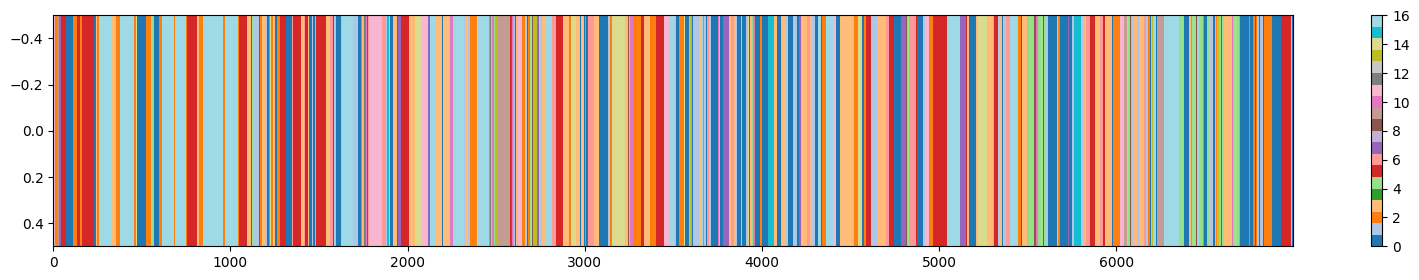

In [73]:
#need to get plot for first and last animals to make a live plot

syll_include = 22
use_labels = [labels[0]]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

arr=labels_align(use_labels).T
plt.figure(figsize=(20, 3)) 
plt.imshow(arr[:,:7000], cmap='tab20', vmin=0, vmax=16, aspect='auto', interpolation='none')
plt.colorbar()


In [22]:
behav_struct = pd.DataFrame(columns=['Transitions', 'Unique', 'Entropy', 'Entropy_transitions', 'Local Entropy', 'Group'])   #make a dataframe

In [ ]:
plt_group = 'MitoPark_22-24'
syll_include = 20
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

ent = entropy_rate(use_labels, use_tmxs, truncate_syllable=20, normalize='bigram', smoothing=1.0, tm_smoothing=1.0)
ent2 = entropy_rate2(use_labels, use_tmxs, truncate_syllable=20, normalize='bigram', smoothing=1.0, tm_smoothing=1.0)
ent3 = []

for k in use_tmxs:
    ent3.append(np.sum(local_entropy(k, truncate_syllable=20)))


uni = labels_unique(use_labels)
tra = labels_transition(use_labels)
df = {'Transitions': tra, 'Unique': uni, 'Entropy': ent, 'Entropy_transitions': ent2, 'Local Entropy': ent3, 'Group': plt_group}

behav_struct = pd.concat([behav_struct, pd.DataFrame(df)])
behav_struct
behav_struct.to_csv('Mito_behavioral_structure.csv')

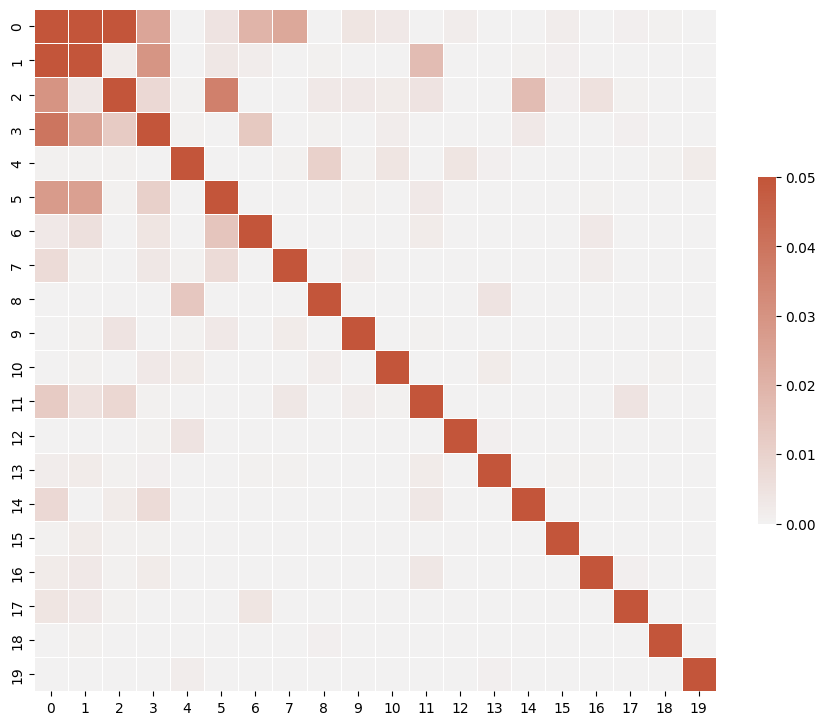

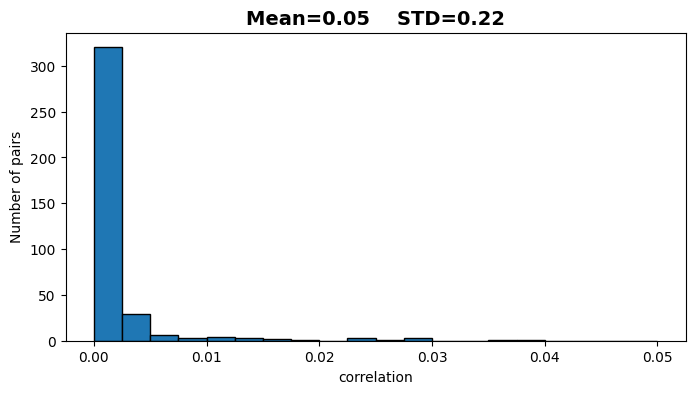

In [105]:
#Threshold Probability matrices to determine more probable modules

plt_group = 'Control_6-8'
syll_include = 20
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

def plot_correlation(corr = np.array, diagonal=True, mask=False, annot=False, cdf=False, Vmin=0, Vmax=0.25, Thresh=0.1):        
    #Plot the correlation as a triange seaborn matrix
    
    #get rid of the diagonal in symmetric matrix
    if diagonal==False:
        np.fill_diagonal(corr,1)
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    # Generate a mask for the upper triangle
    if mask==True:
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, cmap=cmap, center=0,
                    square=True, annot=annot, mask=mask | (np.abs(corr) <= Thresh), vmin=Vmin, vmax=Vmax, linewidths=.5, cbar_kws={"shrink": .5})
    else:    
        sns.heatmap(corr, cmap=cmap, center=0,
                    square=True, annot=annot, vmin=Vmin, vmax=Vmax, linewidths=.5, cbar_kws={"shrink": .5})
    
    
    fig1 = plt.figure(figsize=(8, 4))
    ax1 = fig1.add_subplot() 
    frq1, edges1 = np.histogram(corr, bins=20, range=(Vmin,Vmax))
    ax1.set_title('Mean={0:.2f}    STD={1:.2f}'.format(corr.mean(), corr.std()), {'fontsize': 14,
 'fontweight' : 'bold'})
    ax1.bar(edges1[:-1], frq1, width=np.diff(edges1), edgecolor="black", align="edge")
    ax1.set_xlabel('correlation')
    ax1.set_ylabel('Number of pairs')
    
    if cdf==True:
        fig2 = plt.figure(figsize=(8, 4))
        ax2 = fig2.add_subplot()
        ax2.hist(corr.flatten(), bins=20, range=[Vmin,Vmax], density=True, cumulative=True, histtype='step', label='cumulative distribution')
        ax2.set_xlabel('Correlation')
        ax2.set_ylabel('Proportion')

def reachability_matrix(P):
    n = P.shape[0]
    R = P.copy()  # Initialize with the transition matrix

    for _ in range(n):
        R = np.logical_or(R, np.dot(R, P))

    return R.astype(int)

def communicating_classes(R):
    n = R.shape[0]
    classes = []
    visited = set()

    for i in range(n):
        if i not in visited:
            comm_class = {j for j in range(n) if R[i, j] and R[j, i]}
            classes.append(comm_class)
            visited.update(comm_class)

    return classes


plot_correlation(use_tmxs[0][:syll_include,:syll_include], diagonal = False, Vmin=0, Vmax=0.05)

In [93]:
# Calculate basic statistic using scipy

import scipy
from itertools import product

def calculate_stats(df, parameter):
    pvalues = []
    pvalue_asterisks = []
    x_values = df["Group"].unique()
    
    for x in product(x_values, x_values):
            stat, pvalue = scipy.stats.ttest_ind(
                df.loc[df["Group"] == x[0], parameter],
                df.loc[df["Group"] == x[1], parameter]
            )
            
            pvalues.append(pvalue)
    
    stars=dict(zip(product(x_values, x_values),pvalues))

    for key, value in stars.items():
        print(f"{key}: {value}")


calculate_stats(behav_struct, 'Transitions')

('Control_22-24', 'Control_22-24'): 1.0
('Control_22-24', 'MitoPark_6-8'): 0.0029479961381662745
('Control_22-24', 'MitoPark_12-14'): 0.003195245319954151
('Control_22-24', 'MitoPark_22-24'): 1.5823233297090828e-08
('MitoPark_6-8', 'Control_22-24'): 0.0029479961381662745
('MitoPark_6-8', 'MitoPark_6-8'): 1.0
('MitoPark_6-8', 'MitoPark_12-14'): 0.13337522671622343
('MitoPark_6-8', 'MitoPark_22-24'): 2.501890932041661e-10
('MitoPark_12-14', 'Control_22-24'): 0.003195245319954151
('MitoPark_12-14', 'MitoPark_6-8'): 0.13337522671622343
('MitoPark_12-14', 'MitoPark_12-14'): 1.0
('MitoPark_12-14', 'MitoPark_22-24'): 6.880177196328686e-07
('MitoPark_22-24', 'Control_22-24'): 1.5823233297090828e-08
('MitoPark_22-24', 'MitoPark_6-8'): 2.501890932041661e-10
('MitoPark_22-24', 'MitoPark_12-14'): 6.880177196328686e-07
('MitoPark_22-24', 'MitoPark_22-24'): 1.0
